In [1]:
##### SCIKIT-LEARN or SKLEARN #####
#
#  - Python Machine Learning Module
#  - Simple and efficient tools for data mining and data analysis
#  - Accessible to everybody, and reusable in various contexts
#  - Built on NumPy, SciPy, and matplotlib
#  - Open source, commercially usable - BSD license
#
# https://scikit-learn.org/stable/index.html
# https://scikit-learn.org/stable/user_guide.html 
# https://scikit-learn.org/stable/modules/classes.html
# https://scikit-learn.org/stable/auto_examples/

In [2]:
# The sklearn ML API is very consistent:
# 0) read data
# 1) explore data
# 2) preprocess data
# 3) setup data for consumption by ML model 
#     4) choose the model by importing the appropriate estiamtor class from sklearn [from sklearn import model]
#     5) instantiate the model with desired parameter values [ml=model()]
#     6) fit the model to the training data [ml.fit(Xtrain, ytrain)]
#     7) apply the model to test data [ypred=ml.predict(Xtest) or ml.transform(Xtest)]
# 8) evaluate model
# 9) deploy/use model

In [3]:
# We'll use regression as an example to illustrate these steps
# https://scikit-learn.org/stable/modules/linear_model.html
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [4]:
import pandas as pd
import numpy as np

In [5]:
# 0) read data
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# 1) explore data
# not demonstrating for this example

In [7]:
# 2) preprocess data
# not demonstrating for this example

In [8]:
# 3) setup data for ml model

X = df.drop(['label'], axis=1)
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Linear Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Ordinary least squares:
# minmize ||y - Xw||^2_2 
# OLS requires features to be independent, and is prone to multicolinearity when features are linearly dependent

from sklearn.linear_model import LinearRegression # 4) choose the model by importing the appropriate estiamtor class from sklearn
lr = LinearRegression()                                                # 5) instantiate the model with desired parameter values
lr.fit(X_train, y_train)                                                    # 6) fit the model to the training data
y_pred = lr.predict(X_test)                                          # 7) apply the model to test data 

print (lr.coef_)
print (lr.intercept_)

[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
42.93352585337733


4.835373458200553
0.7634174432138457


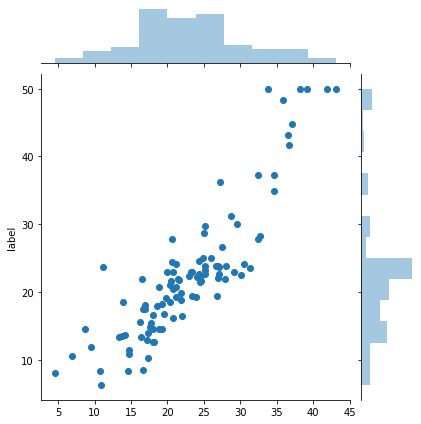

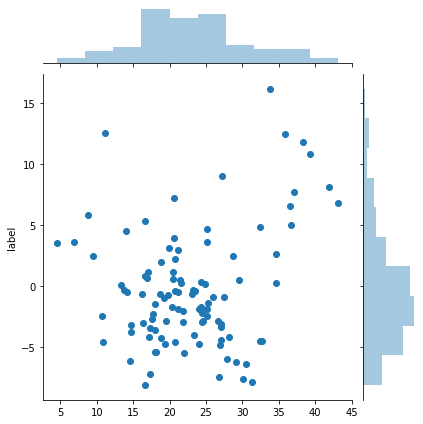

In [10]:
# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print(metrics.r2_score(y_test, y_pred)) # r-square

# plot predicted vs actual and predicted vs residuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.jointplot(y_pred, y_test) 
sns.jointplot(y_pred, (y_test - y_pred))        

In [11]:
# 9) deploy/use model
lr.predict([[0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94]]) # sample from training set; expected label 33.4

array([28.01181038])

In [12]:
# Lasso Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Least squares with L1 regularization:
# minimize (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
# L1 norm here causes the model to prefer solutions with fewer non-zero coefficients, 
# effectively reducing the number of features upon which the given solution is dependent.

from sklearn.linear_model import Lasso
lr = Lasso(alpha=1.0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)  

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print(metrics.r2_score(y_test, y_pred)) # r-square

5.964778128710209
0.6399927356461494


In [13]:
# Ridge Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Least squares with L2 regularization:
# minmize ||y - Xw||^2_2 + alpha * ||w||^2_2
# L2 norm here imposes a penalty on the size of the coefficients, the larger the value of alpha, 
# the greater the amount of shrinkage and thus the coefficients become more robust to collinearity

from sklearn.linear_model import Ridge
rr = Ridge(alpha=1.0)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)  

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print(metrics.r2_score(y_test, y_pred)) # r-square

4.813222475577847
0.7655800611077146


In [14]:
# ElasticNet Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Least squares with L1 and L2 regularization:
# minimize 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)  

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print(metrics.r2_score(y_test, y_pred)) # r-square

5.743109061167527
0.6662534357446656


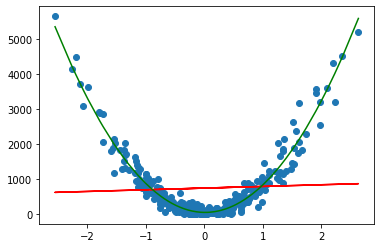

In [15]:
# Polynomial Regression

# generate a dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 300, n_features=1, noise=5)
y = y*y

# fit linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
ypred = lr.predict(X)

# fit polynomial regression model - by using polynomial features with linear regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
Xpoly = poly.fit_transform(X)
pr = LinearRegression()
pr.fit(Xpoly, y)
yppred = pr.predict(Xpoly)
sortedX, sortedyppred = zip(*sorted(zip(X, yppred))) # first zip, then sort, then unzip

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, ypred, 'r-')
plt.plot(sortedX, sortedyppred, 'g-')